In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Definición de las funciones fundamentales

def HG(g):
    # HG: Funcion que calcula el valor de cos(θ) para un parametro g dado
    ξ = np.random.random()
    if g == 0:
        return 1 - 2*ξ
    else:
        return (0.5/g)*(1+ g**2 - ((1-g**2)/(1-g+2*g*ξ))**2)

def rotate(g, v):
    # HG: Funcion que calcula el valor de cos(θ) para un parametro g dado
    # Esta función calcula el vector v rotado, dado un vector v inicial y un parametro g
    cosθ = HG(g)
    sinθ = np.sqrt(1- cosθ**2)
    ϕ = 2*np.pi*np.random.random()
    sinϕ = np.sin(ϕ)
    cosϕ = np.cos(ϕ)
    if abs(v[2]) == 1.0:
        v = np.array((sinθ*cosϕ,sinθ*sinϕ,cosθ/abs(v[2])))
    else:
        vx = v[0]*cosθ + (sinθ/np.sqrt(1-v[2]**2))*(cosϕ*v[0]*v[2] + sinϕ*v[1])
        vy = v[1]*cosθ + (sinθ/np.sqrt(1-v[2]**2))*(cosϕ*v[1]*v[2] - sinϕ*v[0])
        vz = v[2]*cosθ - sinθ*np.sqrt(1-v[2]**2)*cosϕ
        v = np.array((vx,vy,vz))
    return v

def MonteCarlo(Nphotons, d, σa, σs, g):
    
    # Esta función realiza la simulación de la propagación con el método de Metrópolis
    # Recibe como parámetros el número de fotones, y los valores de las constantes
    # físicas del sistema σa, σs, el ancho del material y el parametro g.
    # Esta funcion entrega el valor de los coeficientes T, R, A y las coordenadas (x,y)
    # de los fotones que logran transmitirse luego del proceso de dispersion
    
    
    T, R, A = 0.0, 0.0, 0.0
    σt = σs + σa
    Xdis = []
    Ydis = []
    for n in range(0, Nphotons):
        r = np.array((0.0, 0.0, 0.0))
        v = np.array((0.0, 0.0, 1.0))
        while 1:
            λ = -np.log(np.random.random())/σt #Calculo de la distancia de dispersion
            if v[2]> 0:
                dB = (d-r[2])/v[2] #Definicion de la longitud a la frontera
            else:
                dB = -r[2]/v[2]
                
            if λ > dB:
                if v[2] > 0: #Si el foton logra transmitirse
                    T += 1
                    Xdis.append(r[0] + dB*v[0]/v[2])
                    Ydis.append(r[1] + dB*v[1]/v[2])               
                    break
                else: #Si el foton se escapa al medio de incidencia
                    R += 1
                    break
            else:
                τ = np.random.random()
                if τ < σa/σt: #Si el foton se absorbe
                    A += 1
                    break
                else:
                    r += λ*v
                    v = rotate(g, v)
    return T, R, A, Xdis, Ydis
                    
        
    

In [3]:
t1, r1, a1, xd1, yd1 = MonteCarlo(10000, 1, 1, 2, 0.95)
t2, r2, a2, xd2, yd2 = MonteCarlo(10000, 1, 1, 2, 0.05)
t3, r3, a3, xd3, yd3 = MonteCarlo(10000, 1, 1, 2, 0.5)

(-3.0, 3.0)

<Figure size 720x720 with 0 Axes>

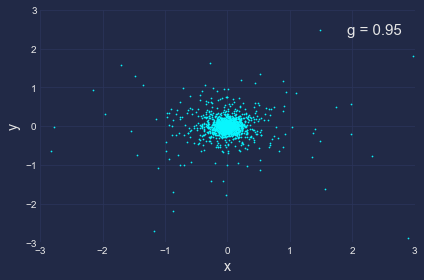

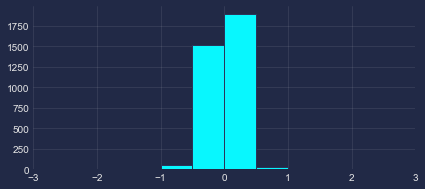

In [4]:
plt.figure(figsize = (10,10))

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
fig, ax = plt.subplots()

plt.scatter(xd1, yd1, color='#08F7FE',s = 0.5, label = "g = 0.95")
plt.grid(color = '#2A3459')
plt.tight_layout()
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(fontsize = 15, loc = 0)
plt.tight_layout()
#plt.savefig('scatter095.png')


plt.figure(figsize = (6.85,3))
plt.hist(xd1, np.arange(-3, 3, 0.5), range = (-3,3), color = '#08F7FE', histtype='bar', ec = '#2A3459' )
plt.grid('#2A3459', alpha = 0.1)
plt.xlim([-3,3])
#plt.savefig('hist095.png')


(-3.0, 3.0)

<Figure size 720x720 with 0 Axes>

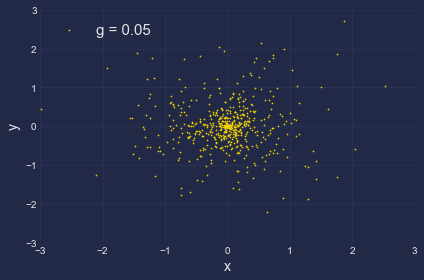

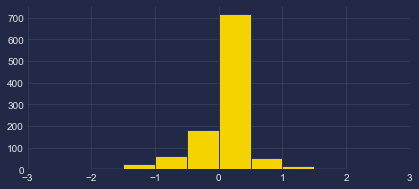

In [5]:
plt.figure(figsize = (10,10))

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
fig, ax = plt.subplots()

plt.scatter(xd2, yd2, color='#F5D300',s = 0.5, label = "g = 0.05")
plt.grid(color = '#2A3459')
plt.tight_layout()
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(fontsize = 15, loc = 0)
plt.tight_layout()
#plt.savefig('scatter005.png')

plt.figure(figsize = (6.85,3))
plt.hist(xd2, np.arange(-4, 4, 0.5), range = (-3,3), color = '#F5D300', histtype='bar', ec = '#2A3459' )
plt.grid('#2A3459', alpha = 0.1)
plt.xlim([-3,3])
#plt.savefig('hist005.png')

(-3.0, 3.0)

<Figure size 720x720 with 0 Axes>

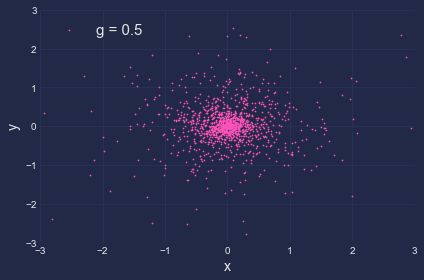

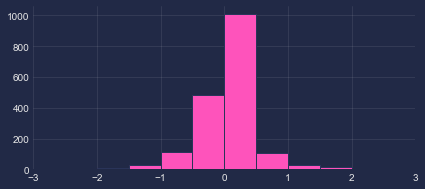

In [6]:
plt.figure(figsize = (10,10))

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
fig, ax = plt.subplots()

plt.scatter(xd3, yd3, color='#FE53BB',s = 0.5, label = "g = 0.5")
plt.grid(color = '#2A3459')
plt.tight_layout()
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(fontsize = 15, loc = 0)
plt.tight_layout()
#plt.savefig('scatter05.png')

plt.figure(figsize = (6.85,3))
plt.hist(xd3, np.arange(-4, 4, 0.5), range = (-3,3), color = '#FE53BB', histtype='bar', ec = '#2A3459' )
plt.grid('#2A3459', alpha = 0.1)
plt.xlim([-3,3])
#plt.savefig('hist05.png')

In [7]:
def MonteCarlo_savepath(d, σa, σs, g):
    # Esta función realiza la simulación de la propagación con el método de Metrópolis
    # Recibe como parámetros el número de fotones, y los valores de las constantes
    # físicas del sistema σa, σs, el ancho del material y el parametro g.
    # Esta funcion entrega el valor de las coordenadas (x,y,z)
    # de los fotones a medida que ocurre el proceso de dipersión
    σt = σs + σa
    X = []
    Y = []
    Z = []
    r = np.array((0.0, 0.0, 0.0))
    v = np.array((0.0, 0.0, 1.0))
    while 1:
        λ = 0.22 #-np.log(np.random.random())/σt
        if v[2]> 0:
            dB = (d-r[2])/v[2]
        else:
            dB = -r[2]/v[2]

        if λ > dB:
            X.append(r[0])
            Y.append(r[1])
            Z.append(r[2])
            if v[2] > 0:        
                break
            else:
                break
        else:
            X.append(r[0])
            Y.append(r[1])
            Z.append(r[2])
            τ = np.random.random()
            if τ < σa/σt:
                break
            else:
                r += λ*v
                v = rotate(g, v)
    return X,Y,Z

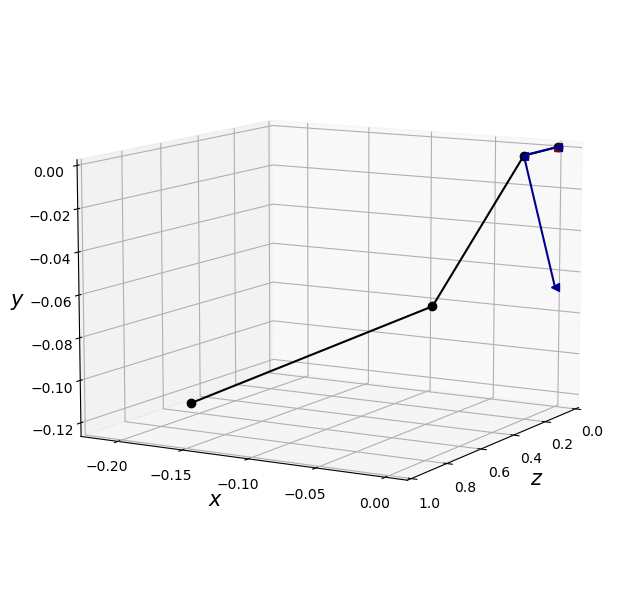

In [8]:
X1,Y1,Z1= MonteCarlo_savepath(1, 1, 9, 0.97)
X2,Y2,Z2= MonteCarlo_savepath(1, 3, 13, 0.03)
X3,Y3,Z3= MonteCarlo_savepath(1, 1, 6, 0)

plt.style.use("default")
fig = plt.figure(figsize = (6,6), facecolor='white')
ax = plt.axes(projection='3d')
ax.plot3D(Z1, X1, Y1, 'o-', c = 'k')
ax.plot3D(Z2,X2,Y2, '^-', c = 'darkred')
ax.plot3D(Z3,X3,Y3, '<-', c = 'darkblue')
ax.set_xlim(0,1)
ax.set_xlabel(r'$z$', fontsize = 15)
ax.set_ylabel(r'$x$', fontsize = 15)
ax.set_zlabel(r'$y$', fontsize = 15)
ax.view_init(10, 30)
plt.tight_layout()
#plt.savefig('3D_view.png', bbox_inches="tight")

In [9]:
def MonteCarlo_LB(Nphotons, darray, σa, σs, g):
    # Esta función realiza la simulación de la propagación con el método de Metrópolis
    # Recibe como parámetros el número de fotones, y los valores de las constantes
    # físicas del sistema σa, σs, un arreglo con los anchos del material y el parametro g.
    # Esta funcion entrega el valor de los coeficientes T, R, A en una matriz en la cual
    # las filas se determinan por el ancho del medio.
    
    σt = σs + σa
    Coeff = np.zeros((3, len(darray)))
    for i in range(0,len(darray)):
        T, R, A = 0.0, 0.0, 0.0
        for n in range(0, Nphotons):
            r = np.array((0.0, 0.0, 0.0))
            v = np.array((0.0, 0.0, 1.0))
            while 1:
                λ = -np.log(np.random.random())/σt
                if v[2]> 0:
                    dB = (darray[i]-r[2])/v[2]
                else:
                    dB = -r[2]/v[2]

                if λ > dB:
                    if v[2] > 0:
                        T += 1           
                        break
                    else:
                        R += 1
                        break
                else:
                    τ = np.random.random()
                    if τ < σa/σt:
                        A += 1
                        break
                    else:
                        r += λ*v
                        v = rotate(g, v)
        Coeff[0, i] = T/Nphotons
        Coeff[1, i] = A/Nphotons
        Coeff[2, i] = R/Nphotons
    return Coeff

def BeerLambert_exp(x, a, b):
    #Esta función calcula la funcion a*exp(-bx) para comprobar la ley de Beer-Lambert-Bouger
    return a*np.exp(-b*x)

Text(0, 0.5, 'T')

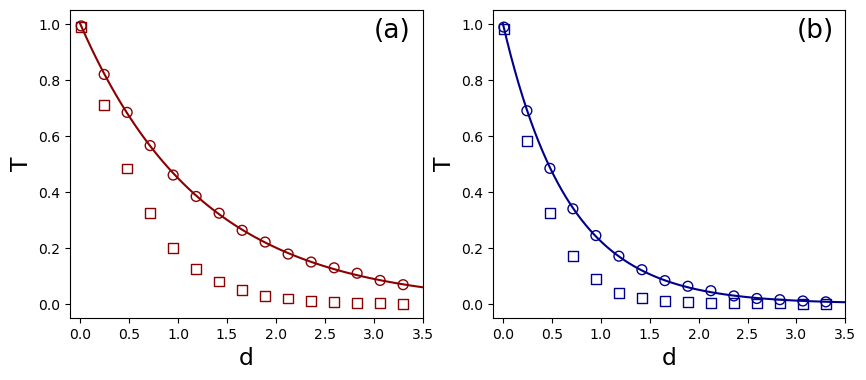

In [10]:
darray = np.linspace(0.01, 3.3, 15)
x = np.linspace(0, 4, 100)

datLB1 = MonteCarlo_LB(10000, darray, 0.8, 0.0, 0.75)
datLB1nc = MonteCarlo_LB(10000, darray, 0.8, 5, 0.75)
datLB2 = MonteCarlo_LB(10000, darray, 1.5, 0.0, 0.75)
datLB2nc = MonteCarlo_LB(10000, darray, 1.5, 5, 0.75)
yLB1 = BeerLambert_exp(x, 1, 0.8)
yLB2 = BeerLambert_exp(x, 1, 1.5)

plt.figure(figsize = (10,4))
plt.style.use("default")

plt.subplot(121)
plt.scatter(darray, datLB1[0,:], color = 'none', edgecolors= 'darkred', s = 50)
plt.scatter(darray, datLB1nc[0,:] , marker = "s", color = 'none', edgecolors= 'darkred', s = 50)
plt.plot(x, yLB1, color = 'darkred')
plt.text(3, 0.95, '(a)', fontsize = 19)
plt.plot
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('T', fontsize = 17)

plt.subplot(122)
plt.scatter(darray, datLB2[0,:], color = 'none', edgecolors= 'darkblue', s = 50)
plt.scatter(darray, datLB2nc[0,:] , marker = "s", color = 'none', edgecolors= 'darkblue', s = 50)
plt.plot(x, yLB2, color = 'darkblue')
plt.text(3, 0.95, '(b)', fontsize = 19)
plt.plot
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('T', fontsize = 17)

#plt.savefig('TransCoeff.png')

Text(0, 0.5, 'R')

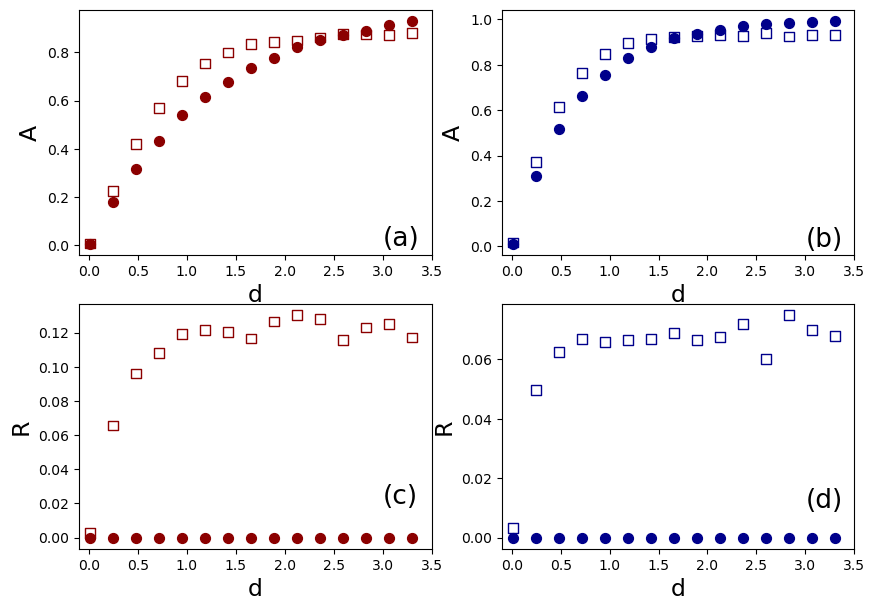

In [11]:
plt.figure(figsize = (10,7))
plt.style.use("default")

plt.subplot(221)
plt.scatter(darray, datLB1[1,:], color = 'darkred', s = 50)
plt.scatter(darray, datLB1nc[1,:] , marker = "s", color = 'none', edgecolors= 'darkred', s = 50)
plt.text(3, 0, '(a)', fontsize = 19)
plt.plot
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('A', fontsize = 17)

plt.subplot(222)
plt.scatter(darray, datLB2[1,:], color = 'darkblue', s = 50)
plt.scatter(darray, datLB2nc[1,:] , marker = "s", color = 'none', edgecolors= 'darkblue', s = 50)
plt.text(3, 0., '(b)', fontsize = 19)
plt.plot
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('A', fontsize = 17)

plt.subplot(223)
plt.scatter(darray, datLB1[2,:], color = 'darkred', s = 50)
plt.scatter(darray, datLB1nc[2,:] , marker = "s", color = 'none', edgecolors= 'darkred', s = 50)
plt.text(3, 0.02, '(c)', fontsize = 19)
plt.plot
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('R', fontsize = 17)

plt.subplot(224)
plt.scatter(darray, datLB2[2,:], color = 'darkblue', s = 50)
plt.scatter(darray, datLB2nc[2,:] , marker = "s", color = 'none', edgecolors= 'darkblue', s = 50)
plt.text(3, 0.01, '(d)', fontsize = 19)
plt.xlim([-0.1,3.5])
plt.xlabel('d', fontsize = 17)
plt.ylabel('R', fontsize = 17)

#plt.savefig('ARCoeff.png')

